In [11]:
!pip install pandas openpyxl
%pip install matplotlib pandas openpyxl



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


,Category,Count,Percentage
0,Anomalies,2614,14.832889
1,Clean Entries,15009,85.167111
2,Total Entries,17623,100.000000


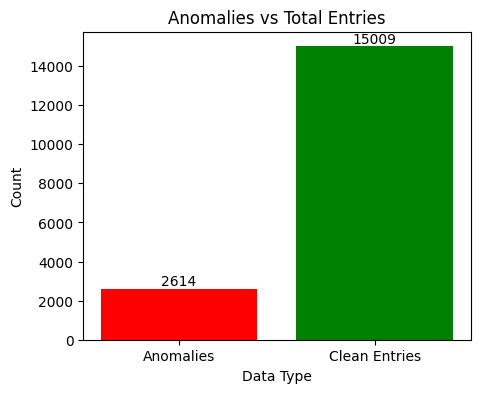

In [ ]:

import pandas as pd
import re

# Step 2: Load your Excel file
df = pd.read_excel("Atlanta_Business_License_Records_2025.xlsx")

# Step 3: Function to detect repeated words
def has_repeated_words(text):
    words = str(text).split()
    return any(words.count(word) > 1 for word in words)

# Step 4: Function to detect weird characters
def has_weird_chars(text):
    # allows letters, numbers, spaces, comma, period, #, and -
    return bool(re.search(r"[^a-zA-Z0-9\s,.\-#]", str(text)))

# Step 5: Function to detect very short or very long addresses
def is_unusual_length(text):
    length = len(str(text))
    return length < 5 or length > 100  # you can adjust these numbers

# Step 6: Apply the functions to address_concat
df['repeated_words'] = df['address_concat'].apply(has_repeated_words)
df['weird_chars'] = df['address_concat'].apply(has_weird_chars)
df['unusual_length'] = df['address_concat'].apply(is_unusual_length)

# Step 7: Filter all anomalies
anomalies = df[(df['repeated_words'] == True) | 
               (df['weird_chars'] == True) | 
               (df['unusual_length'] == True)]

# Step 8: Save anomalies to a new Excel file
anomalies.to_excel("address_anomalies.xlsx", index=False)

# Step 9: Show the first few anomalies
anomalies[['address_concat', 'repeated_words', 'weird_chars', 'unusual_length']].head()

# Step 10: Summary of anomalies
import matplotlib.pyplot as plt

# Count total entries and anomalies
total_entries = len(df)
total_anomalies = len(anomalies)
clean_entries = total_entries - total_anomalies

# Display as a small summary table
summary = pd.DataFrame({
    'Category': ['Anomalies', 'Clean Entries', 'Total Entries'],
    'Count': [total_anomalies, clean_entries, total_entries],
    'Percentage': [total_anomalies/total_entries*100,
                   clean_entries/total_entries*100,
                   100.0]
})

display(summary)

# Step 11: Plot a simple bar chart
plt.figure(figsize=(5,4))
plt.bar(['Anomalies', 'Clean Entries'], [total_anomalies, clean_entries], color=['red', 'green'])
plt.title('Anomalies vs Clean Entries')
plt.ylabel('Count')
plt.xlabel('Data Type')

# Add the numbers on top of the bars
for i, val in enumerate([total_anomalies, clean_entries]):
    plt.text(i, val + total_entries*0.01, str(val), ha='center', fontsize=10)

plt.show()



Total entries: 17623
Entries without 'GA', 'Atlanta', or 'Georgia': 432


,Category,Count,Percentage
0,Without GA/Georgia/Atlanta,432,2.451342
1,With GA/Georgia/Atlanta,17191,97.548658


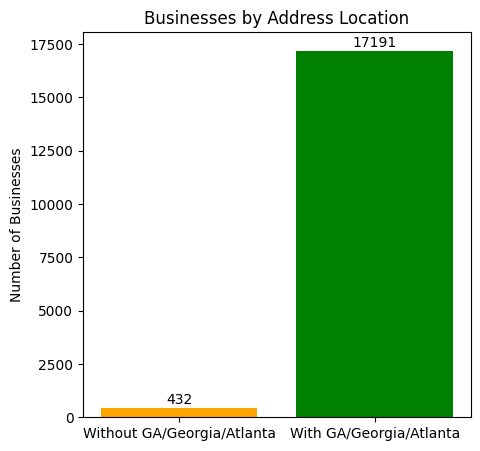

In [15]:
# Step 1: Filter addresses that do NOT contain 'GA', 'Atlanta', or 'Georgia' (case-insensitive)
mask = ~df['address_api'].str.contains(r'GA|Atlanta|Georgia', case=False, na=False)

# Step 2: Extract those rows
no_ga_atl_ga = df[mask]

# Step 3: Save to a new Excel file
no_ga_atl_ga.to_excel("addresses_without_GA_Atlanta_Georgia.xlsx", index=False)

# Step 4: Optional — quick summary
print(f"Total entries: {len(df)}")
print(f"Entries without 'GA', 'Atlanta', or 'Georgia': {len(no_ga_atl_ga)}")
no_ga_atl_ga.head()

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the filtered Excel file
no_ga_atl_ga = pd.read_excel("addresses_without_GA_Atlanta_Georgia.xlsx")

# Step 2: Load the original Excel file again (for comparison)
df = pd.read_excel("Atlanta_Business_License_Records_2025.xlsx")

# Step 3: Calculate counts
total = len(df)
no_ga_count = len(no_ga_atl_ga)
with_ga_count = total - no_ga_count

# Step 4: Create a summary DataFrame (optional)
summary = pd.DataFrame({
    'Category': ['Without GA/Georgia/Atlanta', 'With GA/Georgia/Atlanta'],
    'Count': [no_ga_count, with_ga_count],
    'Percentage': [no_ga_count/total*100, with_ga_count/total*100]
})

display(summary)

# Step 5: Plot the results
plt.figure(figsize=(5,5))
plt.bar(summary['Category'], summary['Count'], color=['orange', 'green'])
plt.title('Businesses by Address Location')
plt.ylabel('Number of Businesses')

# Add count labels on bars
for i, val in enumerate(summary['Count']):
    plt.text(i, val + total*0.01, str(val), ha='center', fontsize=10)

plt.show()


In [17]:
!pip freeze > requirements.txt
